In [12]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load generated graphs

In [13]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap = 299):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+".dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graphk3(file_name,gap = 299):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+"_k3.dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_dym_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/Dymond/"+file_name+"_dym.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_tag_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_stm_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/STM/"+file_name+"_STM.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in


def load_all_graphs(file_name):
    a = load_origin_graph(file_name,gap=299)
    b = load_ETNgen_graph(file_name)
    bb = load_ETNgen_graphk3(file_name)
    c = load_stm_graph(file_name)
    d = load_dym_graph(file_name)
    e = load_tag_graph(file_name)
    return a,b,bb,c,d,e

In [14]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w


from matplotlib.patches import Patch
from matplotlib.lines import Line2D



def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,stm_gen,dym_gen,tag_gen,nb,legend=False):
    ax.plot(moving_average(nb_interactions(orig_graphs)),color=ORIGINAL_COLOR,label="Original", lw=1.5, ls='dashed')
    ax.plot(moving_average(nb_interactions(etn_gen)),color=ETN_COLOR,label="ETN")
    ax.plot(moving_average(nb_interactions(stm_gen)),color=STM_COLOR,label="Stm")
    ax.plot(moving_average(nb_interactions(dym_gen)),color=DYM_COLOR,label="Dymond")
    ax.plot([1],color=TAG_COLOR,label="TagGen")

    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Number of interactions")
    if nb == 0:
        ax.set_title("Hospital")
    if nb == 1:
        ax.set_title("Workplace")
    if nb == 2:
        ax.set_title("High school")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#FFFFFF')
    # ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')



    if nb == 0:
        a = plt.axes([.62, .9, .25, .1])
        ax.axis(ymin=0,ymax=85)
    if nb == 1:
        a = plt.axes([.62, .55, .25, .1])
        ax.axis(ymin=0,ymax=30)
    if nb == 2:
        a = plt.axes([.62, .205, .25, .1])
        ax.axis(ymin=0,ymax=80)


    plt.plot(moving_average(nb_interactions(tag_gen)),color=TAG_COLOR)
    plt.plot(moving_average(nb_interactions(etn_gen)),color=ETN_COLOR)
    plt.plot(moving_average(nb_interactions(stm_gen)),color=STM_COLOR)
    plt.plot(moving_average(nb_interactions(dym_gen)),color=DYM_COLOR)
    plt.plot(moving_average(nb_interactions(orig_graphs)),color=ORIGINAL_COLOR)
    plt.xticks([])
    plt.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    plt.gca().yaxis.grid(True, color='#FFFFFF')
    plt.gca().set_facecolor('#EFEFEF')
    plt.gca().xaxis.grid(False)
    
    if legend:
        legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                           Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                           Patch(facecolor=STM_COLOR, edgecolor=STM_COLOR,label='STM'),
                           Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen'),
                           Patch(facecolor=DYM_COLOR, edgecolor=DYM_COLOR,label='Dymond')]

        # Create the figure
        ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(0.0, -0.3),ncol=5)

def plot_nb_inter_nb_nodes(axess,a,b,c,d,e,nb_nodes):
    x11,x22,x33,x44,x55 = nb_nodes
    axes = axess[1]
    
    width = 0.1
    x = np.arange(1)

    axes = axess[1]
    axes.bar(x-0.15,x22[0],width,color=ETN_COLOR,yerr=x22[1])
    axes.bar(x-0.05,x33[0],width,color=STM_COLOR,yerr=x33[1])
    axes.bar(x+0.05,x55[0],width,color=TAG_COLOR,yerr=x55[1])
    axes.bar(x+0.15,x44[0],width,color=DYM_COLOR,yerr=x44[1])
    axes.plot([-0.25,0.25],[x11,x11],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR,alpha=0.7)
    axes.tick_params(bottom=False, right=False,left=False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.yaxis.set_label_position("right")
    axes.yaxis.tick_right()
    labels = ["Number of nodes"]
    axes.set_xticks(x)
    axes.set_xticklabels(labels,rotation=0)
    

    axes.set_axisbelow(True)
    axes.yaxis.grid(True, color='#FFFFFF')
    axes.set_facecolor('#EFEFEF')
    axes.xaxis.grid(False)



In [15]:
a,b,b2,c,d,e = load_all_graphs("LH10")
aa,bb,bb2,cc,dd,ee = load_all_graphs("InVS13")
aaa,bbb,bbb2,ccc,ddd,eee = load_all_graphs("High_School11")

In [22]:

ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"

In [30]:
nb_nodes_lh = [75,[75.0,0],[75.0,0],[182.4, 12.009995836801943],[18.6, 2.727636339397171],[75.0,0]]
nb_nodes_in = [92,[92.0,0],[92.0,0],[200.6, 28.51385628076287],[91.7, 0.45825756949558394],[92.0,0]]
nb_nodes_hs = [126,[126.0,0],[126.0,0],[370.56, 18.211260252931424],[58.7, 6.542935121182236],[126.0,0]]

#nb_nodes_lh = [75,[75.0,0],[182.4, 12.009995836801943],[18.6, 2.727636339397171],[75.0,0]]
#nb_nodes_in = [92,[92.0,0],[200.6, 28.51385628076287],[91.7, 0.45825756949558394],[92.0,0]]
#nb_nodes_hs = [126,[126.0,0],[370.56, 18.211260252931424],[58.7, 6.542935121182236],[126.0,0]]

In [35]:
import numpy as np
def nb_interactions(graphs):
    res = []
    for g in graphs:
        res.append(len(g.edges()))
    return(res)
def moving_average(x, w=10):
    return np.convolve(x, np.ones(w), 'valid') / w


from matplotlib.patches import Patch
from matplotlib.lines import Line2D



def plot_nb_inter_one_axes(ax,orig_graphs,etn_gen,etn_gen2,stm_gen,dym_gen,tag_gen,nb,legend=False,line_width=1.5):
        
    tmp = moving_average(nb_interactions(orig_graphs))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR, label="Original", lw=line_width)
        
    #tmp = moving_average(nb_interactions(etn_gen))
    #x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    #ax.plot(x,tmp,color=ETN_COLOR, label="ETN", lw=line_width)
    
    tmp = moving_average(nb_interactions(etn_gen2))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ETN_COLOR, label="ETN", lw=line_width)
    
                         
    tmp = moving_average(nb_interactions(stm_gen))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=STM_COLOR, label="Stm", lw=line_width)
                         
    tmp = moving_average(nb_interactions(dym_gen))
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=DYM_COLOR, label="Dymond", lw=line_width)
        
    ax.plot([1],color=TAG_COLOR,label="TagGen")


    
    ax.set_ylabel("Number of interactions")
    if nb == 0:
        ax.set_title("Hospital")
    if nb == 1:
        ax.set_title("Workplace")
    if nb == 2:
        ax.set_title("High school")

    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')

    
    

    if nb == 0:
        a = plt.axes([.62, .9, .25, .1])
        ax.axis(ymin=0,ymax=85)
        ax.add_patch(plt.Rectangle((.67, .66), .5, .4, ec="white", fc="white",
                           transform=ax.transAxes))
    if nb == 1:
        a = plt.axes([.62, .55, .25, .1])
        ax.axis(ymin=0,ymax=30)
        ax.add_patch(plt.Rectangle((.67, .66), .5, .4, ec="white", fc="white",
                           transform=ax.transAxes))
    if nb == 2:
        a = plt.axes([.62, .205, .25, .1])
        ax.axis(ymin=0,ymax=90)
        ax.add_patch(plt.Rectangle((.67, .66), .5, .4, ec="white", fc="white",
                           transform=ax.transAxes))

    
    line_width = 1
    
    plt.plot(moving_average(nb_interactions(tag_gen),30),color=TAG_COLOR, lw=line_width)
    plt.plot(moving_average(nb_interactions(etn_gen),30),color=ETN_COLOR, lw=line_width)
    plt.plot(moving_average(nb_interactions(stm_gen),30),color=STM_COLOR, lw=line_width)
    plt.plot(moving_average(nb_interactions(dym_gen),30),color=DYM_COLOR, lw=line_width)
    plt.plot(moving_average(nb_interactions(orig_graphs)),color=ORIGINAL_COLOR, lw=line_width)
    plt.xticks([])
    plt.tick_params(bottom=False, right=False,left=False)
    plt.gca().spines['top'].set_color('#DDDDDD')
    plt.gca().spines['right'].set_color('#DDDDDD')
    plt.gca().spines['left'].set_color('#DDDDDD')
    plt.gca().spines['bottom'].set_color('#DDDDDD')
    plt.gca().set_axisbelow(True)
    #plt.gca().yaxis.grid(True, color='#FFFFFF')
    #plt.gca().set_facecolor('#EFEFEF')

    
    plt.gca().yaxis.grid(True, color='lightgrey')
    plt.gca().xaxis.grid(False)

    
    if legend:
        legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                           #Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen k=2'),
                           Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen k=3'),
                           Patch(facecolor=STM_COLOR, edgecolor=STM_COLOR,label='STM'),
                           Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen'),
                           Patch(facecolor=DYM_COLOR, edgecolor=DYM_COLOR,label='Dymond')]

        # Create the figure
        ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(0.0, -0.3),ncol=6)        

#rects1 = ax.bar(x - 0.3, x2, width, label='ETN-gen',color=ETN_COLOR2,alpha=0.5)
def plot_nb_inter_nb_nodes(axess,a,b,b2,c,d,e,nb_nodes):
    x11,x22,x222,x33,x44,x55 = nb_nodes
    axes = axess[1]

    
    width = 0.1
    x = np.arange(1)

    error_bar_style = dict(ecolor=ORIGINAL_COLOR, alpha=0.8, lw=1.5, capsize=4, capthick=1)


    axes = axess[1]
    axes.bar(x-0.15,x222[0],width,color=ETN_COLOR,yerr=x222[1], error_kw=error_bar_style)
    #axes.bar(x-0.15,x22[0],width,color=ETN_COLOR,yerr=x22[1], error_kw=error_bar_style)
    axes.bar(x-0.05,x33[0],width,color=STM_COLOR,yerr=x33[1], error_kw=error_bar_style)
    axes.bar(x+0.05,x55[0],width,color=TAG_COLOR,yerr=x55[1], error_kw=error_bar_style)
    axes.bar(x+0.15,x44[0],width,color=DYM_COLOR,yerr=x44[1], error_kw=error_bar_style)
    axes.plot([-0.35,0.25],[x11,x11],linewidth=2, label='Stability',color=ORIGINAL_COLOR,alpha=0.9)
    axes.tick_params(bottom=False, right=False,left=False)
    axes.spines['top'].set_visible(False)
    axes.spines['right'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.yaxis.set_label_position("right")
    axes.yaxis.tick_right()
    labels = ["Number of nodes"]
    axes.set_xticks(x)
    axes.set_xticklabels(labels,rotation=0)

    
    
    axes.set_axisbelow(True)
    #axes.yaxis.grid(True, color='#FFFFFF')
    #axes.set_facecolor('#EFEFEF')
    #axes.xaxis.grid(False)
    
    axes.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    axes.xaxis.grid(False)



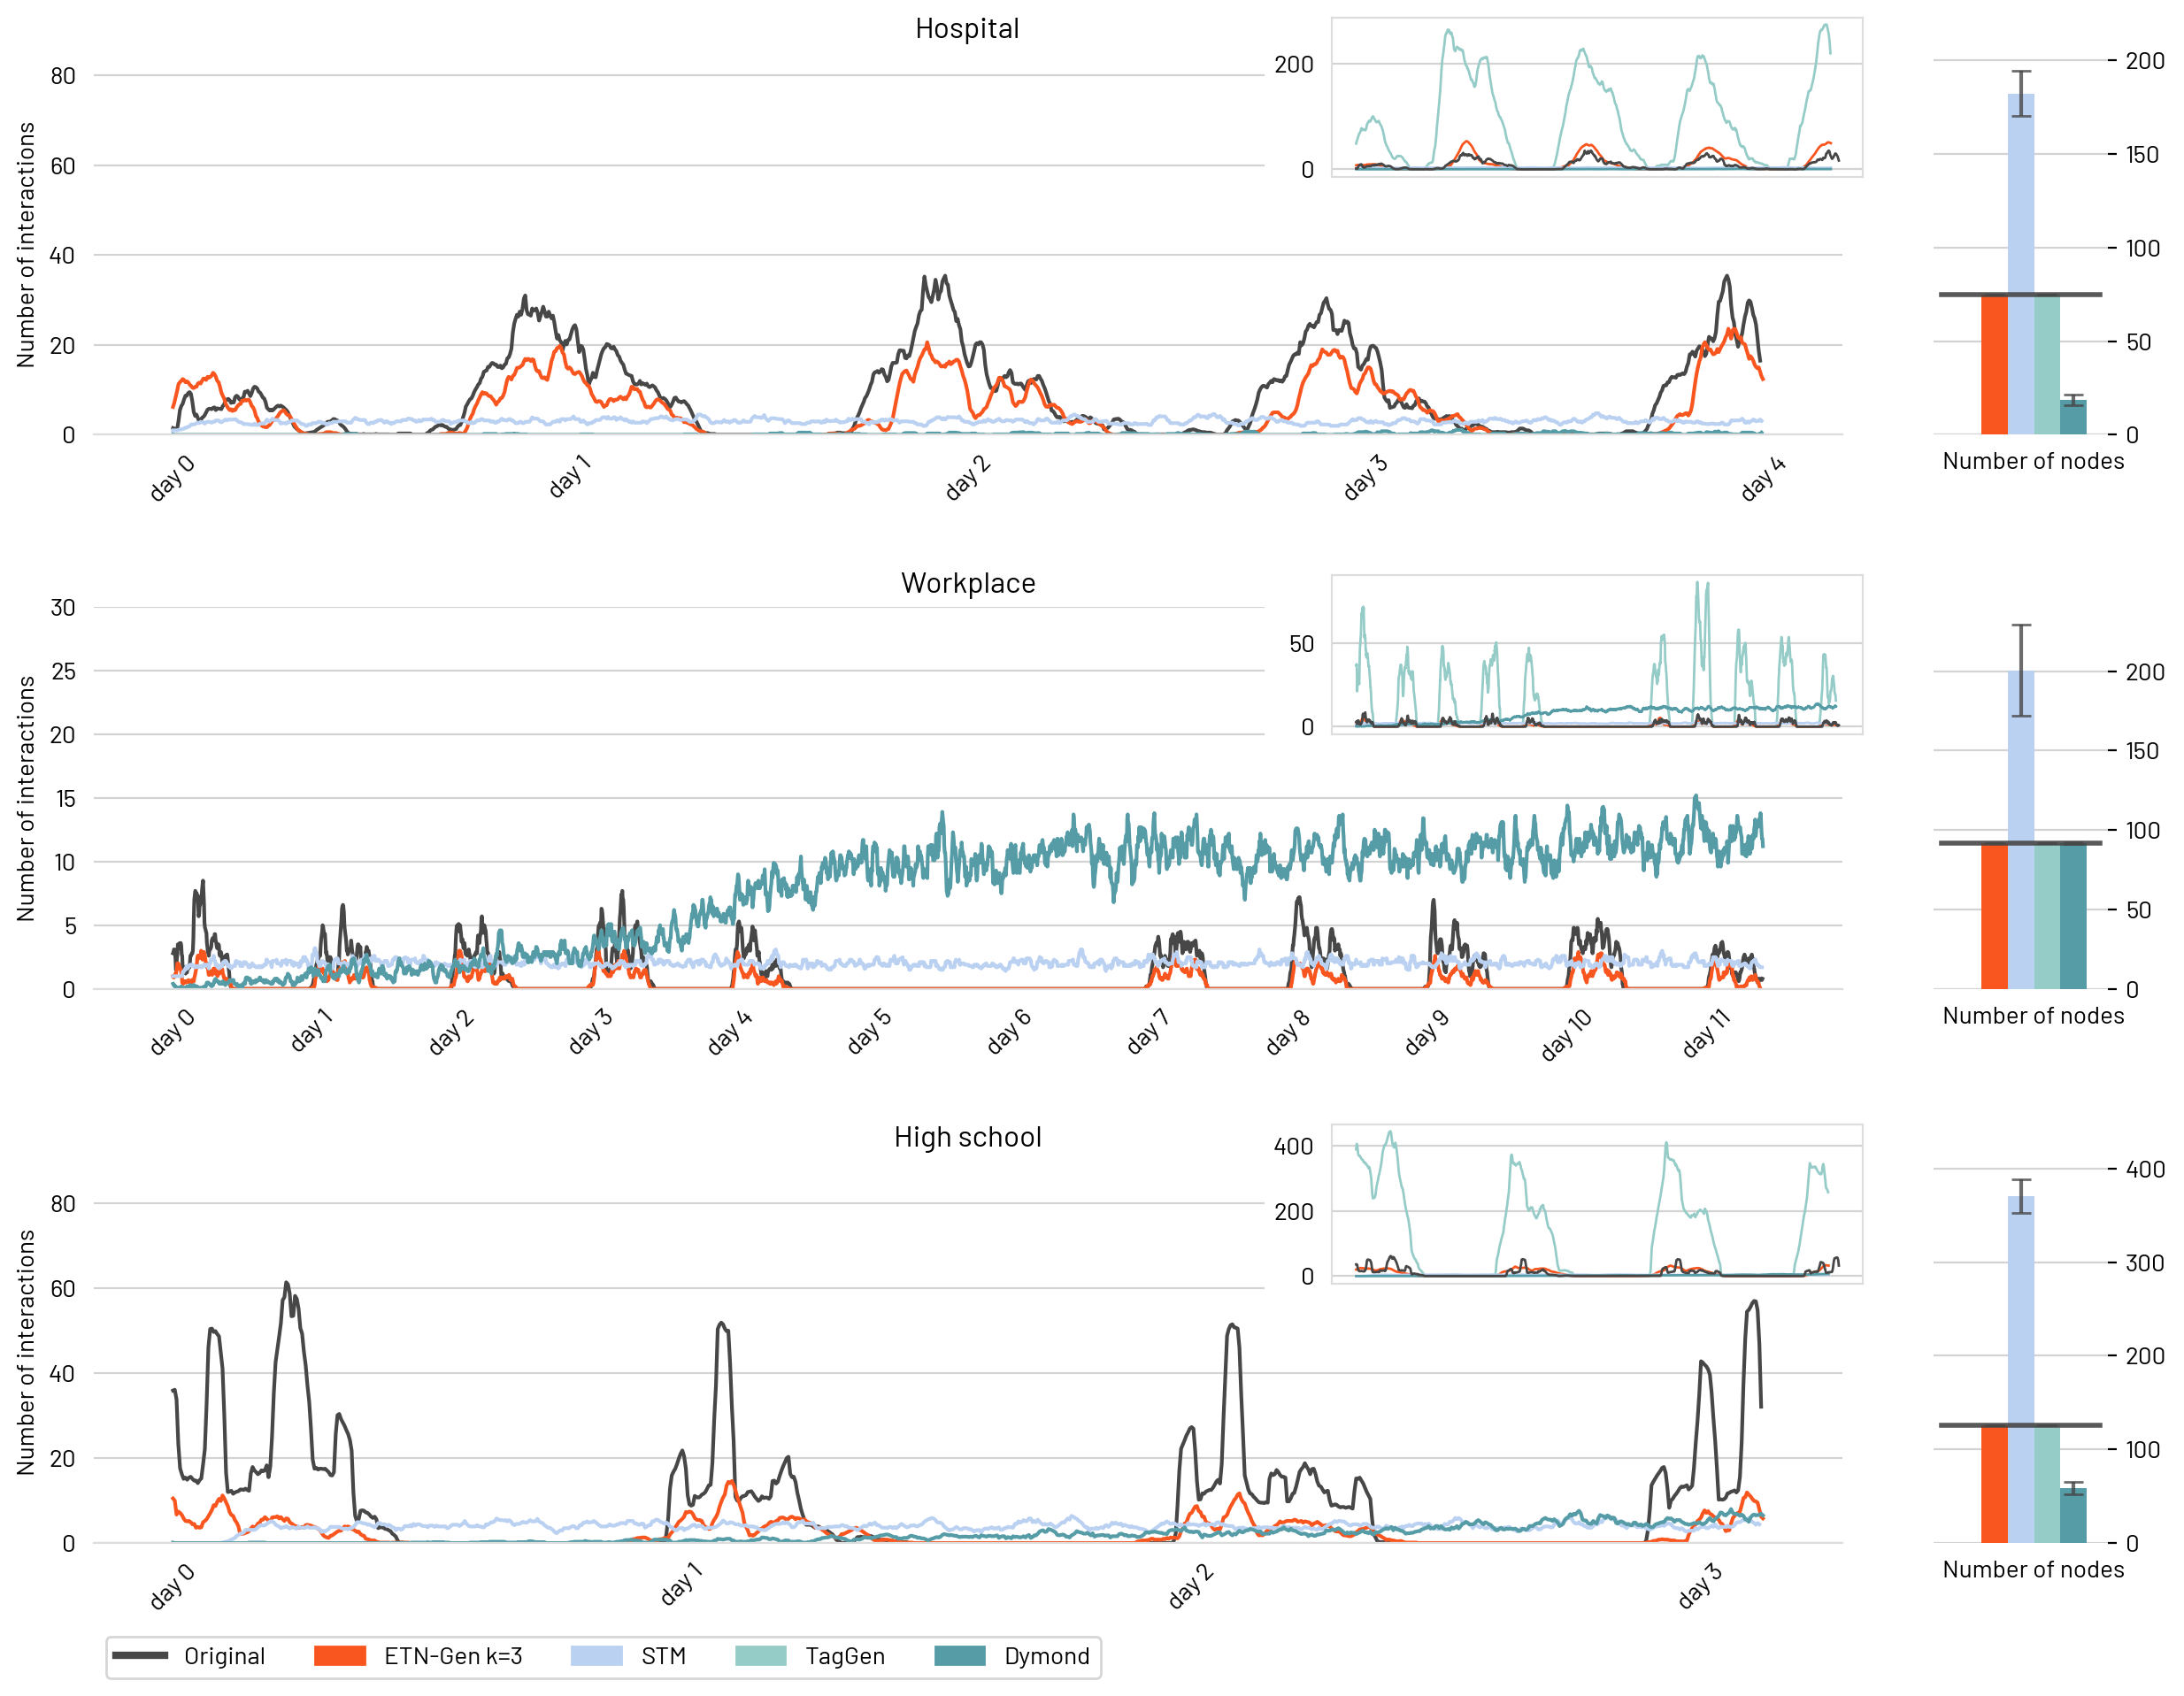

In [36]:


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#f9561f'#'#fb7041' #'#E5865E' # arancio
ETN_COLOR2 = "#fca182"
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

figure, axes = plt.subplots(nrows=3, ncols=2,figsize=(12,9), gridspec_kw={'width_ratios': [10, 1]})
figure.tight_layout(h_pad=5,w_pad=1)
plot_nb_inter_one_axes(axes[0][0],a,b,b2,c,d,e,0)
axes[0][0].set_xticks([0,1,2,3,4],labels=["day 0","day 1","day 2","day 3","day 4"],rotation=45)
plot_nb_inter_nb_nodes(axes[0],a,b,b2,c,d,e,nb_nodes_lh)

plot_nb_inter_one_axes(axes[1][0],aa,bb,bb2,cc,dd,ee,1)
axes[1][0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=["day 0","day 1","day 2","day 3","day 4",
          "day 5","day 6","day 7","day 8","day 9","day 10","day 11"],rotation=45)
plot_nb_inter_nb_nodes(axes[1],aa,bb,bb2,cc,dd,ee,nb_nodes_in)

plot_nb_inter_one_axes(axes[2][0],aaa,bbb,bbb2,ccc,ddd,eee,2,True)
axes[2][0].set_xticks([0,1,2,3],labels=["day 0","day 1","day 2","day 3"],rotation=45)
plot_nb_inter_nb_nodes(axes[2],aaa,bbb,bbb2,ccc,ddd,eee,nb_nodes_hs)

figure.savefig("nb_interactions_main_COM_PHY_k2k3.pdf", bbox_inches = 'tight')

# all interactions

In [ ]:
line_width = 1.5


def plot_all_nb_int_one_graph(ax,ori,gen,title,legend=False,seicento=False):
    ax.set_title(title)
    
    tmp = moving_average(nb_interactions(ori))
    if seicento:
        x = np.arange(0,(len(tmp)*600)/(60*60*24),(len(tmp)*600)/(60*60*24)/len(tmp))
    else:
        x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ORIGINAL_COLOR,label="Original",lw=line_width)
    
    tmp = moving_average(nb_interactions(gen))
    if seicento:
        x = np.arange(0,(len(tmp)*600)/(60*60*24),(len(tmp)*600)/(60*60*24)/len(tmp))
    else:
        x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))
    ax.plot(x,tmp,color=ETN_COLOR, label="ETN", lw=line_width)
    
    
    #ax.set_xlabel("Timestamps")
    #ax.set_ylabel("Number of interactions")
    
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.xaxis.grid(False)
        
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)
    
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
 

    if legend:
        legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                           Line2D([0], [0], color=ETN_COLOR, lw=3,label='ETN-Gen')]#,
                           #Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen')]

        # Create the figure
        ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-1.2, -0.65),ncol=2)

In [ ]:


ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

In [ ]:
hs11 = load_origin_graph("High_School11")
hs12 = load_origin_graph("High_School12")
hs13 = load_origin_graph("High_School13")
ps = load_origin_graph("primary_school")
invs = load_origin_graph("InVS13")
lh = load_origin_graph("LH10")

In [ ]:
dtu_c = load_origin_graph("DTU_calls_1sett",599)
dtu_s = load_origin_graph("DTU_SMS_1sett",599)
ff_c = load_origin_graph("FF_calls_1sett",599)
ff_s = load_origin_graph("FF_SMS_1sett",599)

In [ ]:
lh_e = load_ETNgen_graph("LH10")
invs_e = load_ETNgen_graph("InVS13")

hs11_e = load_ETNgen_graph("High_School11")
hs12_e = load_ETNgen_graph("High_
    x = np.arange(0,(len(tmp)*300)/(60*60*24),(len(tmp)*300)/(60*60*24)/len(tmp))School12")
hs13_e = load_ETNgen_graph("High_School13")
ps_e = load_ETNgen_graph("primary_school")

In [ ]:
dtu_c_e = load_ETNgen_graph("DTU_calls_1sett")
dtu_s_e = load_ETNgen_graph("DTU_SMS_1sett")
ff_c_e = load_ETNgen_graph("FF_calls_1sett")
ff_s_e = load_ETNgen_graph("FF_SMS_1sett")

In [ ]:
figure, axes = plt.subplots(nrows=5, ncols=2,figsize=(12,9))
figure.tight_layout(h_pad=5,w_pad=1)

figure.text(0.5, -0.05, 'Timestamps', ha='center',fontdict={'size':16})
figure.text(-0.02, 0.5, 'Number of interactions', va='center', rotation='vertical',fontdict={'size':16})


plot_all_nb_int_one_graph(axes[0][0],lh,lh_e,"Hospital")
axes[0][0].set_xticks([0,1,2,3,4],labels=["day 0","day 1","day 2","day 3","day 4"],rotation=45)
plot_all_nb_int_one_graph(axes[0][1],invs,invs_e,"Workplace")
axes[0][1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],labels=["day 0","day 1","day 2","day 3","day 4",
          "day 5","day 6","day 7","day 8","day 9","day 10","day 11"],rotation=45)

plot_all_nb_int_one_graph(axes[1][0],hs11,hs11_e,"High school")
axes[1][0].set_xticks([0,1,2,3],labels=["day 0","day 1","day 2","day 3"],rotation=45)
plot_all_nb_int_one_graph(axes[1][1],hs12,hs12_e,"High school 2")
axes[1][1].set_xticks([0,1,2,3,4,5,6,7,8],labels=["day 0","day 1","day 2","day 3",
                                                  "day 4","day 5","day 6","day 7","day 8"],rotation=45)

plot_all_nb_int_one_graph(axes[2][0],hs13,hs13_e,"High school 3")
axes[2][0].set_xticks([0,1,2,3,4],labels=["day 0","day 1","day 2","day 3","day 4"],rotation=45)
plot_all_nb_int_one_graph(axes[2][1],ps,ps_e,"Primary school")
axes[2][1].set_xticks([0,1],labels=["day 0","day 1"],rotation=45)

plot_all_nb_int_one_graph(axes[3][0],dtu_s,dtu_s_e,"SMS 1",seicento=True)
axes[3][0].set_xticks([0,1,2,3,4,5,6,7],labels=["day 0","day 1","day 2","day 3","day 4","day 5","day 6","day 7"],rotation=45)
plot_all_nb_int_one_graph(axes[3][1],ff_s,ff_s_e,"SMS 2",seicento=True)
axes[3][1].set_xticks([0,1,2,3,4,5,6,7],labels=["day 0","day 1","day 2","day 3","day 4","day 5","day 6","day 7"],rotation=45)

plot_all_nb_int_one_graph(axes[4][0],dtu_c,dtu_c_e,"Calls 1",seicento=True)
axes[4][0].set_xticks([0,1,2,3,4,5,6,7],labels=["day 0","day 1","day 2","day 3","day 4","day 5","day 6","day 7"],rotation=45)
plot_all_nb_int_one_graph(axes[4][1],ff_c,ff_c_e,"Calls 2",legend=True,seicento=True)
axes[4][1].set_xticks([0,1,2,3,4,5,6,7],labels=["day 0","day 1","day 2","day 3","day 4","day 5","day 6","day 7"],rotation=45)

figure.savefig("nb_interactions_all_main_test_V4.pdf", bbox_inches = 'tight')

# vertical 

In [ ]:

line_width = 1.5

def plot_all_nb_int_one_graph_vertical(ax,ori,gen,title,legend=False):
    #ax.set_title(title)
    ax.set_ylabel(title)
    ax.plot(moving_average(nb_interactions(ori)),color=ORIGINAL_COLOR,label="Original",lw=line_width)
    ax.plot(moving_average(nb_interactions(gen)),color=ETN_COLOR,label="ETN",lw=line_width)
    #ax.set_xlabel("Timestamps")
    #ax.set_ylabel("Number of interactions")
    
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    #ax.yaxis.grid(True, color='#FFFFFF')
    #ax.xaxis.grid(False)
        
    ax.yaxis.grid(True, color='lightgrey')
    #ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)
    
    
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
 

    if legend:
        legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,label='Original'),
                           Line2D([0], [0], color=ETN_COLOR, lw=3,label='ETN-Gen')]#,
                           #Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen')]

        # Create the figure
        ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(0, -1),ncol=2)

In [ ]:
figure, axes = plt.subplots(nrows=10, ncols=1,figsize=(6,12))
figure.tight_layout(w_pad=2)

figure.suptitle('Number of interactions',fontsize=16, y=1.01)

figure.text(0.5, 0, 'Timestamps', ha='center',fontdict={'size':16})
#figure.text(-0.02, 0.5, 'Number of interactions', va='center', rotation='vertical',fontdict={'size':16})


plot_all_nb_int_one_graph_vertical(axes[0],lh,lh_e,"Hospital")
plot_all_nb_int_one_graph_vertical(axes[1],invs,invs_e,"Workplace")

plot_all_nb_int_one_graph_vertical(axes[2],hs11,hs11_e,"High school")
plot_all_nb_int_one_graph_vertical(axes[3],hs12,hs12_e,"High school 2")

plot_all_nb_int_one_graph_vertical(axes[4],hs13,hs13_e,"High school 3")
plot_all_nb_int_one_graph_vertical(axes[5],ps,ps_e,"Primary school")

plot_all_nb_int_one_graph_vertical(axes[6],dtu_s,dtu_s_e,"SMS 1")
plot_all_nb_int_one_graph_vertical(axes[7],ff_s,ff_s_e,"SMS 2")

plot_all_nb_int_one_graph_vertical(axes[8],dtu_c,dtu_c_e,"Calls 1")
plot_all_nb_int_one_graph_vertical(axes[9],ff_c,ff_c_e,"Calls 2",legend=True)

figure.savefig("nb_interactions_all_main_test_V4_vertical.pdf", bbox_inches = 'tight')